# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

1.Independent/Input features or variables: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

2.Target/Output Variable: Number of predicted wins (W).

# Importing libraries

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost 
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Obs :

-Imporing Necessaries libraries: Numpy, pandas, matplotlib & seaborn.

-Importing 5 Machine learning Algorrithm : Linear Regression, Decision Tree Regressor,Randomforest regressor, SVM reg, XGB reg.

-Importing Common Regression Metrics Mean Absolute error, Mean Squared error.

-Importing r2 score.

-Importing Label encoder libraries as well as standard scaler libraries.

# Importing Dataset 

In [191]:
baseball = pd.read_csv('baseball.csv')

In [192]:
df = pd.DataFrame(baseball)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


- All the values present in a variables are intger except ERA col.
- The Values in ERA Col is float
- There is no object type of varible in a dataset.
- Target col has int data type which represent a number of counts representing as no of wins

In [193]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

- ERA is float data type Column
- Rest all are integer data type column.

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


- There are 17 Columns or Variables.
- Only One Float type variable ERA.
- Rest all are integer.
- index 0 is W(Wins) & Index 16 is E(Error)
- The dataset has 30 rows

In [195]:
df.shape

(30, 17)

- The shape command shows that there are 30 rows and 17 column including target variable.

In [196]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

- The Dataset does"nt has missing values

In [197]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


- High std value seen in SO,RA,ER,AB,R Variables.
- It seems Data is spreaded
- Mean greater then 50% Percentile in H,HR
- Max - 75 is seen in E, SV CG, SB,HR
- As per above obs data is spreaded beacuse of high std
- Data is not  normaly distributed

In [198]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

- There are 3 rows or counts displays highest wins of 68.
- There are 2 count of 74 & 76 each & 80 & 83 each

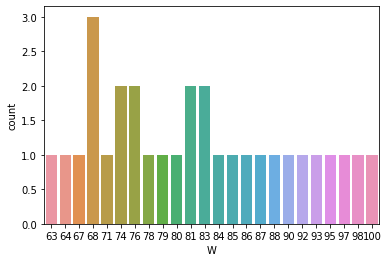

In [199]:
sns.countplot(df['W']);

- There are 3 rows or counts displays highest wins of 68.
- There are 2 count of 74 & 76 each & 80 & 83 each

<AxesSubplot:title={'center':'between 2B and W'}, xlabel='2B', ylabel='W'>

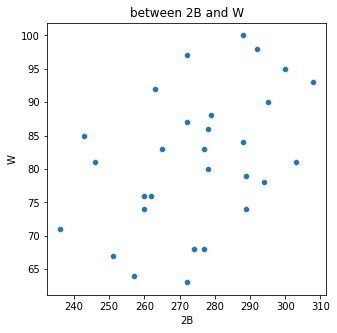

In [200]:
plt.figure(figsize=[5,5])
plt.title('between 2B and W')
sns.scatterplot(df['2B'],df['W'])

- The plot shows data is spreaded and not linear

<AxesSubplot:title={'center':'between ER and W'}, xlabel='ER', ylabel='W'>

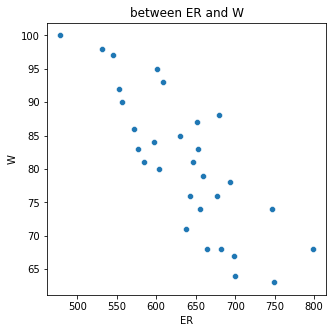

In [201]:
plt.figure(figsize=[5,5])
plt.title('between ER and W')
sns.scatterplot(df['ER'],df['W'])

- The scatter plot shows some negative realationship
- But the data is spreaded.

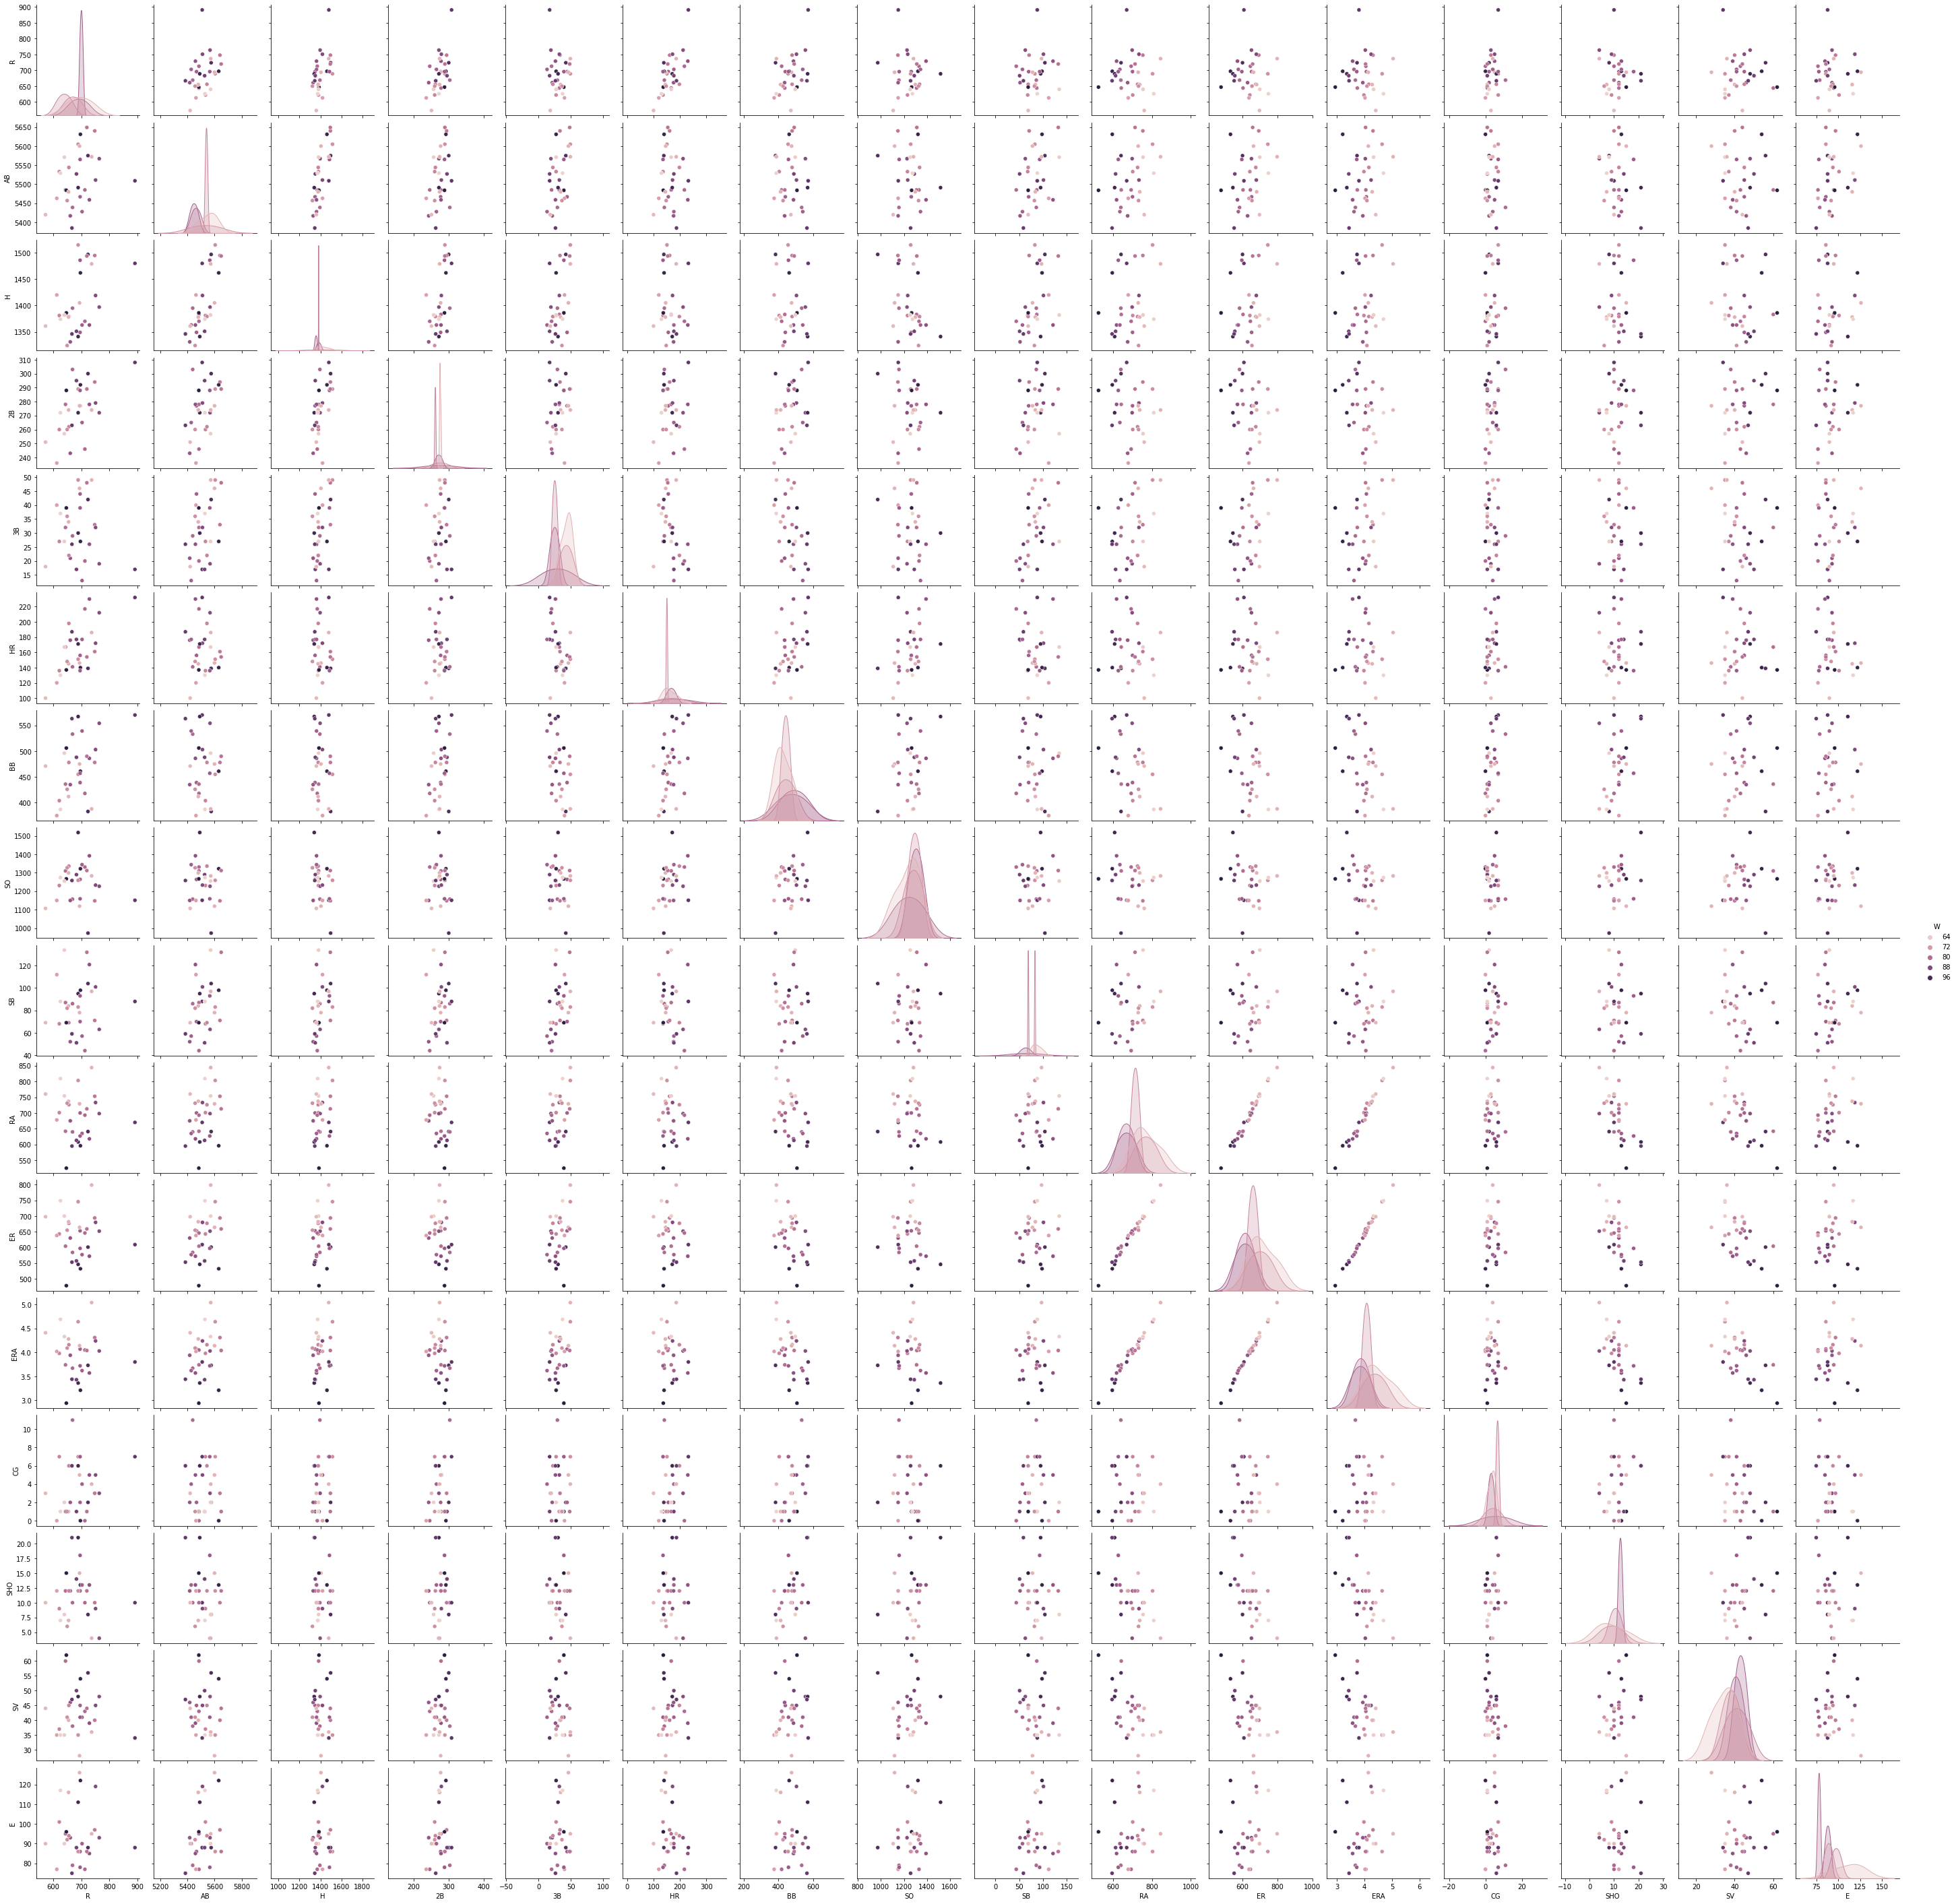

In [202]:
sns.pairplot(df, hue ='W')

-  Data is Spreaded
-  Most of the relationship is not linear with each other.
-  RA, ER & ERA Shows Linear Relationship with each other

# Skewness Detection:
Skewsness is checked with the help of skew command, histogram & disstplot.

In [203]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

- There are positive skewness seen for R, CG,E & SV Variables.
- R has high positive skewness compared to all others

### 1.Histogram Plot:

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>],
       [<AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

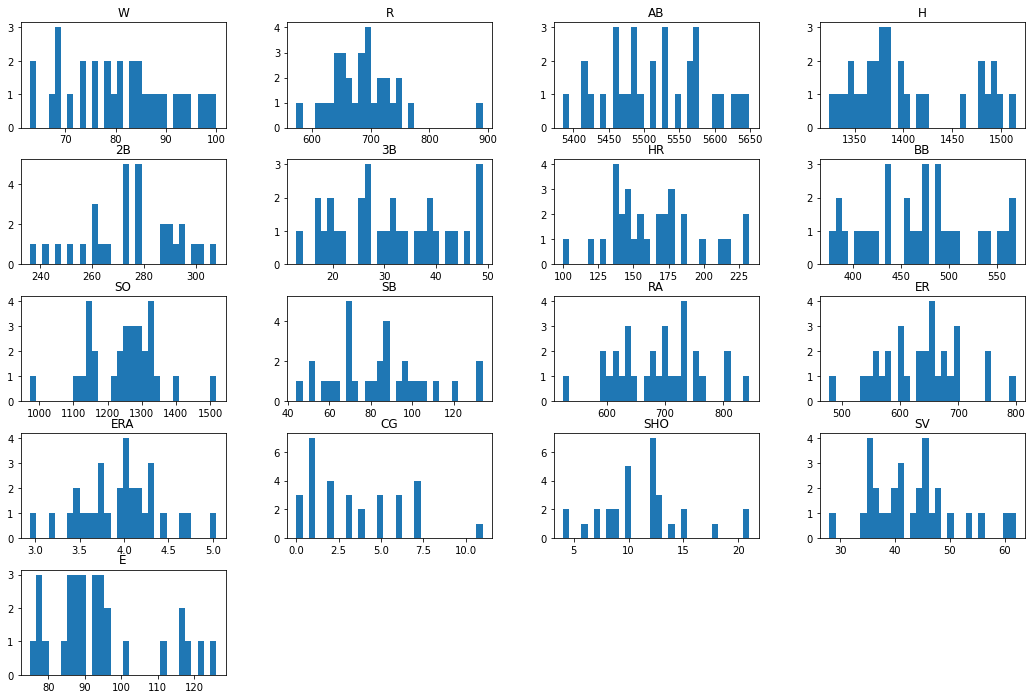

In [204]:
df.hist(grid=False, figsize=(18,12), bins=30)

- There are positive skewness seen for R, CG,E & SV Variables.
- R has high positive skewness compared to all others

### 2.Disstplot:

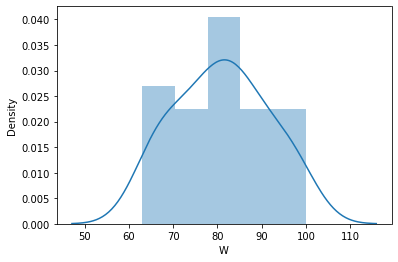

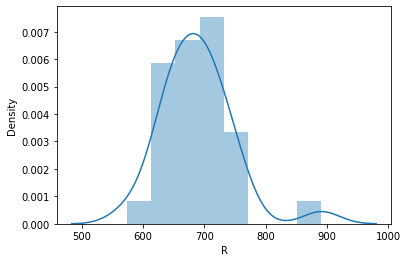

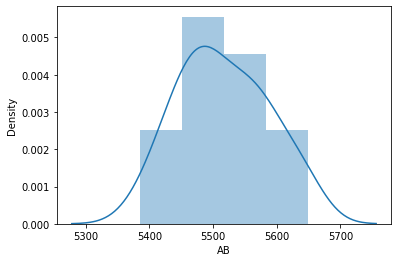

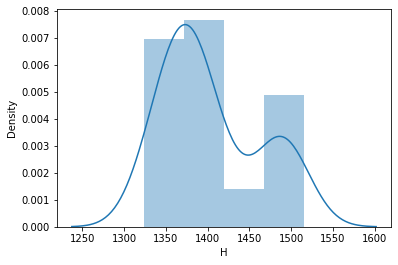

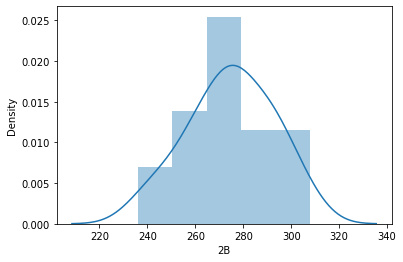

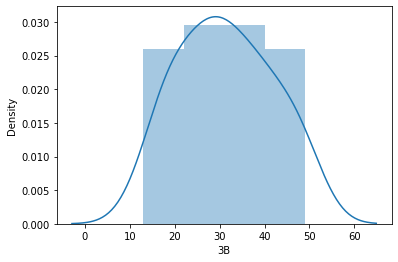

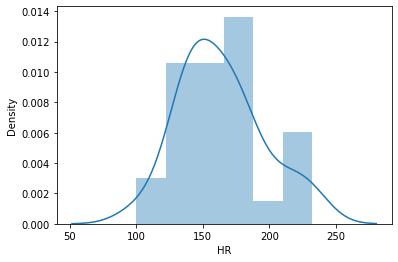

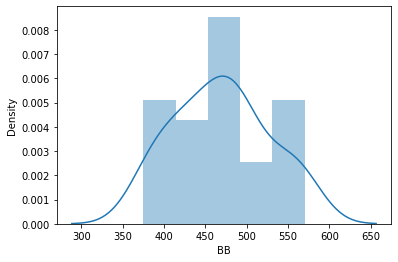

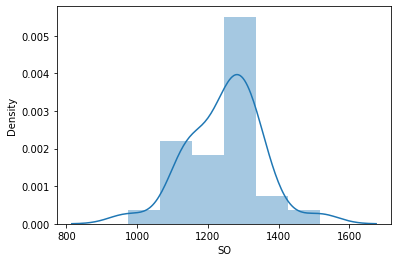

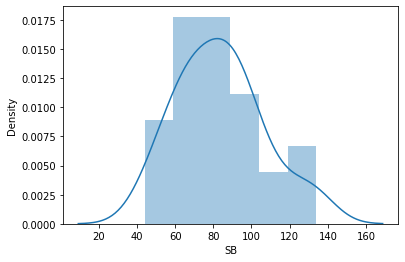

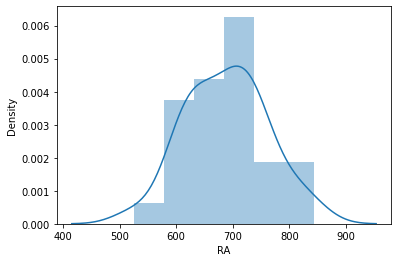

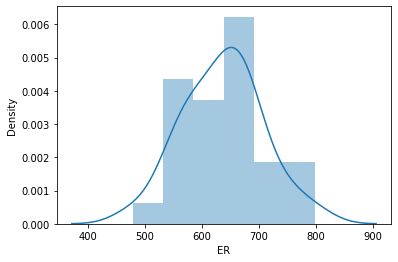

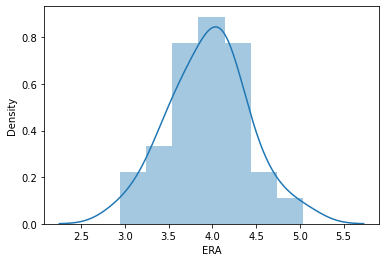

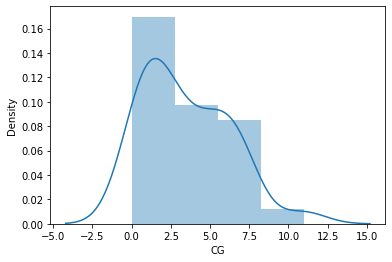

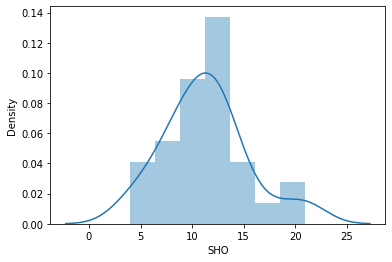

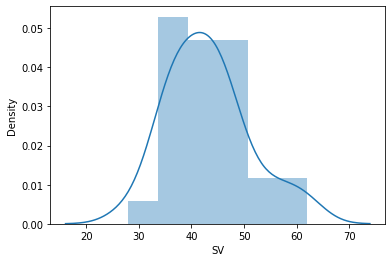

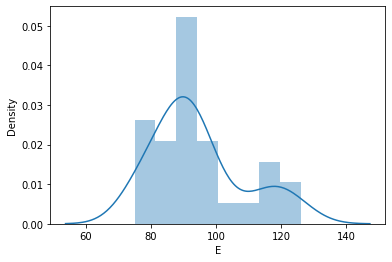

In [205]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

- There are positive skewness seen for R, CG,E & SV Variables.
- R has high positive skewness compared to all others.
- Those Variables are right skewed.

# Boxplot for Outliers Detection:

<AxesSubplot:>

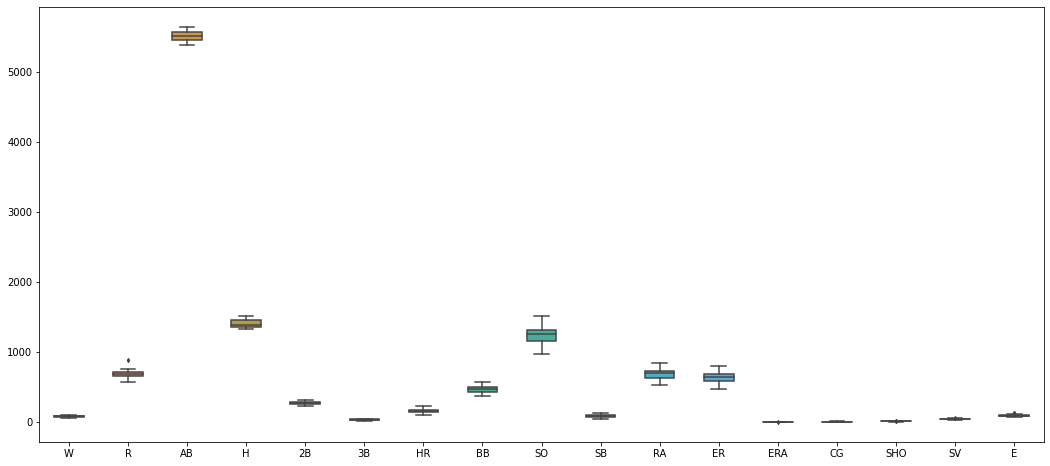

In [206]:
fig, ax =plt.subplots(figsize=(18,8))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- There are no outliers seen in any variables.

# Correlation

In [207]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


- Target Variable  shows corrleation with SV,SHO, 2B & R
- Target Variable shows negative correlation with ER,RA & ERA.
- RA, ER & ERA Shows high positive Correlation & negative correlation with SV & SHO.
- SHO & SV Shows Positive correlation with target variable & Negative Corr with ERA,ER & RA.
- CG & SHO Shows positive correlation with BB.

# Correlation with Heatmap:

<AxesSubplot:>

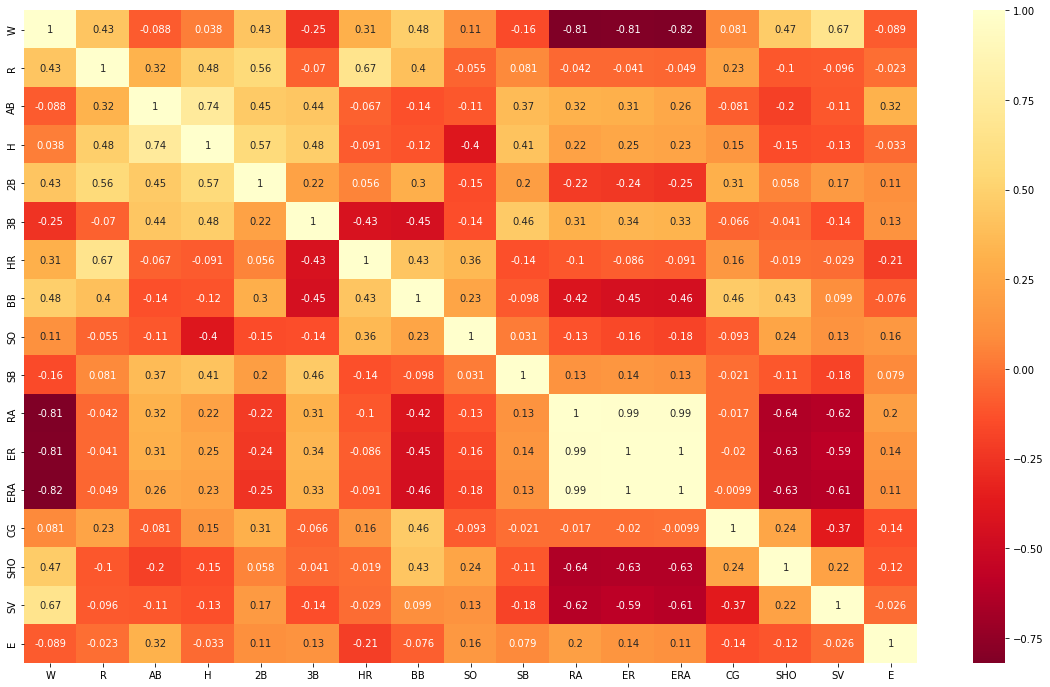

In [208]:
plt.figure(figsize=(20,12))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

- Target Variable  shows corrleation with SV,SHO, 2B & R
- Target Variable shows negative correlation with ER,RA & ERA.
- RA, ER & ERA Shows high positive Correlation & negative correlation with SV & SHO.
- SHO & SV Shows Positive correlation with target variable & Negative Corr with ERA,ER & RA.
- CG & SHO Shows positive correlation with BB.

# VIF : Multicollinearity Test

In [209]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

 - Importing VIF library

In [210]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

- Computing vif on dataframe.

In [211]:
vif_calc()

      VIF Factor features
0    1164.543214        W
1    3253.807721        R
2    5181.779465       AB
3    4817.334228        H
4    1157.105781       2B
5      32.435486       3B
6     309.301103       HR
7     302.099558       BB
8     400.292880       SO
9      28.665516       SB
10  18170.014649       RA
11  51175.790270       ER
12  23668.747242      ERA
13     10.411616       CG
14     33.258426      SHO
15    331.282416       SV
16     96.958680        E


- The vif shows there is high multicollinearity issue present in dataset.
- RA, ER & ERA has high multicollinearity.
- R, AB, H & 2B are multicollinea with each other.

In [212]:
df.drop(['RA','ER','ERA'],axis=1,inplace=True)

- RA, ER & ERA has high multicollinearity, hence dropped.

In [213]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86


- Multicollinear variable (RA, ER & ERA) is not seen in dataframe after removing.

In [214]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

-recomputing vif to check for any multicollinearity present or not.

In [215]:
vif_calc()

     VIF Factor features
0    585.020397        W
1   2589.267199        R
2   3543.990297       AB
3   4160.945729        H
4    777.135039       2B
5     28.103316       3B
6    232.660041       HR
7    255.806894       BB
8    325.896757       SO
9     24.545406       SB
10     7.549257       CG
11    26.024154      SHO
12   218.182770       SV
13    78.013648        E


- R, AB & H shows multicollinearity but i have not removed as they are influencing target variable.

In [216]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,-0.020783,-0.106563,-0.183418,0.079149


- After removing high multocollinear variables, target variable shows corr with SV,SHO,BB,2B & R
- Target Variable Shows Negative Corr with SB & E.
- R Shows Corr with BB,HR, 2B,H,AB & with target & negative corr with SV & SHO.
- AB,H & 2B shows corr with 3B,2B,H & R.
- Similar Obs Can be seen for other variables.

<AxesSubplot:>

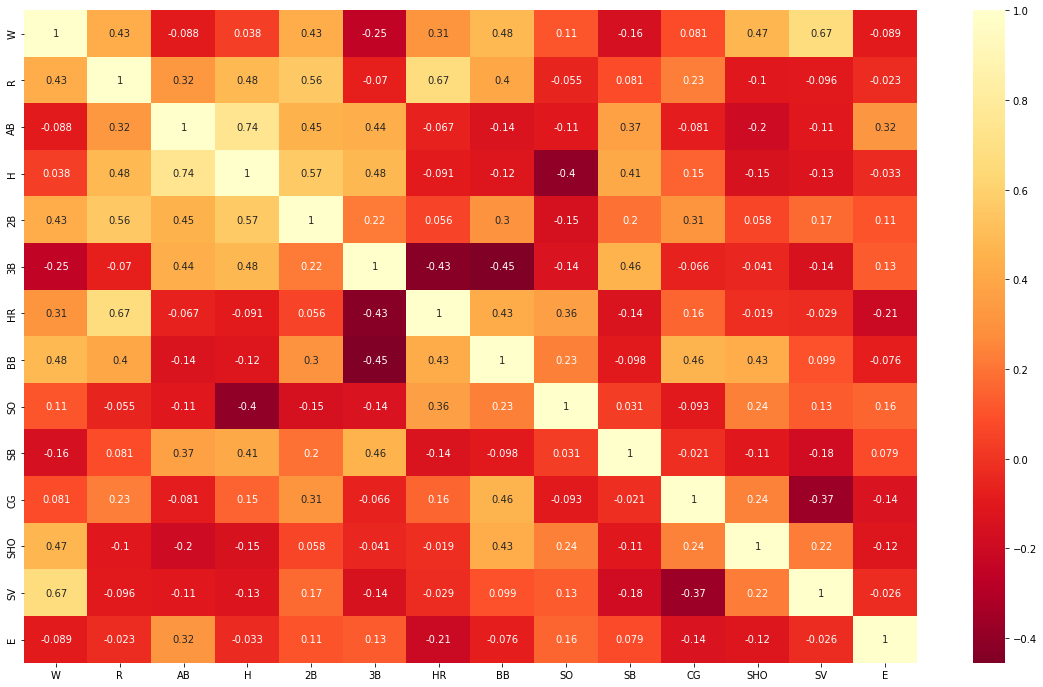

In [217]:
plt.figure(figsize=(20,12))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

- After removing high multocollinear variables, target variable shows corr with SV,SHO,BB,2B & R
- Target Variable Shows Negative Corr with SB & E.
- R Shows Corr with BB,HR, 2B,H,AB & with target & negative corr with SV & SHO.
- AB,H & 2B shows corr with 3B,2B,H & R.
- Similar Obs Can be seen for other variables.

# Removing Skewness from Independent Variables x

In [218]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

- R, E, SV, CG shows positive skewness and the same is treated with sqrt method.

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.763487
dtype: float64

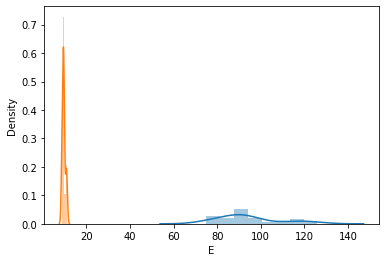

In [219]:
sns.distplot(df['E'])
import numpy as np
df['E']=np.sqrt(df['E'])
sns.distplot(df['E'])
df.skew()

- Orange Spike shows skewness & blue curve shows skewness reduced for variable E.

W      0.047089
R      0.968676
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.763487
dtype: float64

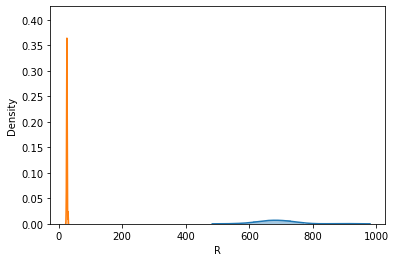

In [220]:
sns.distplot(df['R'])
import numpy as np
df['R']=np.sqrt(df['R'])
sns.distplot(df['R'])
df.skew()

In [ ]:
- Orange Spike shows skewness & blue curve shows skewness reduced for variable R.

W      0.047089
R      0.968676
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
CG    -0.311476
SHO    0.565790
SV     0.657524
E      0.763487
dtype: float64

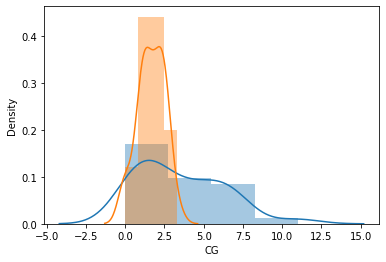

In [221]:
sns.distplot(df['CG'])
import numpy as np
df['CG']=np.sqrt(df['CG'])
sns.distplot(df['CG'])
df.skew()

- Orange Spike shows skewness & blue curve shows skewness reduced for variable CG.

W      0.047089
R      0.968676
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
CG    -0.311476
SHO    0.565790
SV     0.410288
E      0.763487
dtype: float64

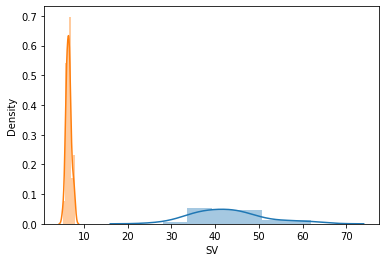

In [222]:
sns.distplot(df['SV'])
import numpy as np
df['SV']=np.sqrt(df['SV'])
sns.distplot(df['SV'])
df.skew()

- Orange Spike shows skewness & blue curve shows skewness reduced for variable SV.

## Dividing Dataset into Independent Variables(x) & Target Variable(y)

In [223]:
x=df.drop("W",axis=1)
y=df["W"]

- x-Independent Variables.
- y-Target Variable(Wins)

In [224]:
x.shape

(30, 13)

- x shows 30 Obs & 13 Col

In [225]:
y.shape

(30,)

- Target Variable shows 30 rows

In [226]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,26.907248,5575,1497,300,42,139,383,973,104,1.414214,8,7.483315,9.380832
1,26.381812,5467,1349,277,44,156,439,1264,70,1.414214,12,6.708204,9.273618
2,25.865034,5439,1395,303,29,141,533,1157,86,3.316625,10,6.164414,8.888194
3,24.939928,5533,1381,260,27,136,404,1231,68,2.645751,9,6.082763,10.049876
4,26.248809,5605,1515,289,49,151,455,1259,83,2.645751,12,5.916080,9.273618


- Independent variable needs to be scaled as they are not in same range.

In [227]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

- Shows top 5 values of target variable.

# Removing Skewness from a dataset

#### Power transform for removing positive & negative skewness

In [228]:
from sklearn.preprocessing import power_transform # Importing power tranform
x=power_transform(x,method='yeo-johnson') # Applying power transform to whole dataframe

- Once Again removing right & left skewness present in independent variables with power transform.

# Scaling the Independent Variables

In [229]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables
x

array([[ 0.7283481 ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.33503677,
        -0.78957937,  1.5464863 , -0.33537946],
       [ 0.26127677,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308, -0.33503677,
         0.25177537,  0.36056077, -0.53264569],
       [-0.24484516,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 ,  2.09269735,
        -0.24539345, -0.60776771, -1.34217954],
       [-1.2852649 ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  1.19963317,
        -0.51075929, -0.76465171,  0.67868363],
       [ 0.13566527,  0.        ,  0.        ,  0.79218291,  1.61644394,
        -0.3298501 , -0.20677062,  0.08545863,  0.07962852,  1.19963317,
         0.25177537, -1.09521504, -0.53264569],
       [ 2.67127052,  0.      

- Independent variables are scaled so that there values fall in similar range.

In [230]:
x.shape

(30, 13)

- 30 obs & 13 col for independent variables after scaling & power xform.

In [231]:
y.shape

(30,)

- Shows 30 obs where I have not applied power xform & scaling as it is a target variables which may effect MAE.

# Decision Tree is Configured for 200 Random State

In [232]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred=DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)

8.8 at random_state 0
7.4 at random_state 1
12.5 at random_state 2
12.6 at random_state 3
12.0 at random_state 4
6.1 at random_state 5
8.7 at random_state 6
7.5 at random_state 7
8.7 at random_state 8
6.0 at random_state 9
6.8 at random_state 10
9.4 at random_state 11
7.2 at random_state 12
11.1 at random_state 13
10.7 at random_state 14
16.7 at random_state 15
9.1 at random_state 16
7.6 at random_state 17
7.2 at random_state 18
6.7 at random_state 19
9.6 at random_state 20
6.3 at random_state 21
10.4 at random_state 22
8.6 at random_state 23
9.2 at random_state 24
9.5 at random_state 25
5.9 at random_state 26
9.7 at random_state 27
7.6 at random_state 28
8.2 at random_state 29
8.0 at random_state 30
10.1 at random_state 31
12.7 at random_state 32
12.6 at random_state 33
8.8 at random_state 34
8.5 at random_state 35
10.6 at random_state 36
9.1 at random_state 37
10.9 at random_state 38
9.2 at random_state 39
10.5 at random_state 40
8.1 at random_state 41
9.1 at random_state 42
8.9 at r

- Decisiontree regressor is configured for 200 random state which shows acc for each state.

## Decision Tree Regressor is Set to provide best Random State with leact MAE

In [233]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred = DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  19.77777777777778  on Random_state  68


- Best Random state selected is 68 with MAE = 19.77

# Splitting Training Set & Test Set.

In [234]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 68)

- independent(x) & Target Variable(y) is divided into Train & Test Set.
- 70% data is set for training & 30% data is reserved for testing.
- best Random state is applied which is 68 computed above.

# Linear Regression

In [235]:
lm = LinearRegression() # linear regression instance
lm.fit(x_train,y_train) # applying linear regression on training set to learn the linear relationship.
pred=lm.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
lm.score(x_train,y_train) # how well the model learned

Mean Absolute error:  12.036422207190773
Mean Squared error:  172.257141685998
Root Mean Squared Error: 13.124676822154441
-1.1172729099492926


0.9349961994215373

- Score of Linear Reg is 0.93 & MAE = 12.0, R2 Score is negative.
- R2 Score is negative this indicates data is highly spreaded and following non linear trend where difficult to fit best fit line.

# Decision Tree Regression

In [236]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred = DTR.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
DTR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  19.0
Mean Squared error:  449.22222222222223
Root Mean Squared Error: 21.19486310930604
-4.52154779969651


1.0

- DTR learned the model with 100%.
- DTR MAE = 19
- R2 Score is less more negative with LR

# Random Forest Regression

In [237]:
RFR = RandomForestRegressor()  # Random Forest regressor instance
RFR.fit(x_train, y_train) # applying Random Forest regressor on training set to learn relationship.
pred = RFR.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
RFR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  8.98
Mean Squared error:  119.54964444444447
Root Mean Squared Error: 10.933876002792626
-0.46942658573596385


0.8810182934796812

- RFR has least MAE comparables with others which is 8.98.
- RFR also learned the model well with 88%
- RFR also shows negtive r2 score but which is least then LR,DTR & XGBR.

# Support Vector Regression

In [238]:
SV = SVR() # Support Vector Reg Instance
SV.fit(x_train, y_train) # applying Support Vector Reg on training set to learn  relationship.
pred = SV.predict(x_test) # Applying Support Vector Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
SV.score(x_train,y_train)# how well the model learned

Mean Absolute error:  9.246038759229046
Mean Squared error:  121.23674437122557
Root Mean Squared Error: 11.010755849224228
-0.49016332231703674


0.16184226819316327

- SVR has MAE = 9.2 higher then RFR.
- SVR has not learned model well.
- r2 score is negative

# XGBoost Regression

In [239]:
XGBR = XGBRegressor() # XGBR Instance
XGBR.fit(x_train,y_train) # applying XGBR on training set to learn  relationship.
pred = XGBR.predict(x_test) # Applying XGBR on test data
print('Mean Absolute error: ', mean_absolute_error(y_test,pred))# Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
XGBR.score(x_train,y_train) # how well the model learned     

Mean Absolute error:  10.439342074924046
Mean Squared error:  146.44047954248447
Root Mean Squared Error: 12.10125941968374
-0.7999512660001884


0.9999999979838685

- XGBR has learned the model with 99.99%
- r2 score is negative which higher then RFR & SVR.
- XGBR MAE is greater then RFR, SVR & DTR.

# K-fold Cross Validation

In [240]:
from sklearn.model_selection import cross_val_score  # Obs : Importing cross val score
from sklearn.model_selection import KFold  # Obs : Imporing Kfold CV

In [241]:
cross_validation=KFold(5, shuffle =True)
# Obs : Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [242]:
print(cross_val_score(lm,x,y,cv=cross_validation).mean()) # Obs : Linear Regression CV o/p

0.31741208167820495


In [243]:
print(cross_val_score(DTR,x,y,cv=cross_validation).mean()) # Obs :  DTR Regression CV o/p

-0.3085292833391736


In [244]:
print(cross_val_score(RFR,x,y,cv=cross_validation).mean()) # Obs : Random Forest Regressor CV o/p

0.161105110637018


In [245]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Obs : Support Vector CV o/p

-0.11212870837175268


In [246]:
print(cross_val_score(XGBR,x,y,cv=cross_validation).mean()) # Obs :  XGBoost Regressor CV o/p

-0.35249958699477624


# Best Model Selection

- I have selected RFR as the best algo as it has least MAE among rest others also RFR learned model well.
- RFR has low negative r2 score except.
- diff of RFR & Cross validation is also less.

# Hyperparameter & GridsearchCV

In [247]:
from sklearn.model_selection import GridSearchCV # Obs : importing GridSearchCV

# Setting Random Forest Hyperparameter

In [248]:
import numpy as np
parameter = {'max_depth': np.arange(2,10),
             'max_features': ['log2','sqrt','auto'],
             'min_samples_leaf': [1,2],
             'min_samples_split':[2,5],
             'n_estimators': [50]}

# Creating Gridserach CV Instance

In [249]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=cross_validation)
# Creating Grid Search CV Object and Applying GridSearch on best Model - RFR

In [250]:
GCV.fit(x_train,y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [50]})

- Applying Gridsearchcv to training set with RFR hyperparameters values.

In [251]:
GCV.best_params_ # Giving the Best Gridserach Parameters

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

- Best parameter is selected above

In [254]:
Final_mod = RandomForestRegressor(max_depth = 5, max_features = 'auto', min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
RFR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  8.28048148148148
Mean Squared error:  97.9168127037037
Root Mean Squared Error: 9.895292451651123
-0.20352986783004567


0.8810182934796812

- Best GCV param is applied to RFR.
- where RFR learned the model with 88%.
- MAE is also reduced from 8.98 to 8.28.
- r2 score is also got reduced but still r2 score is negative.

# Exporting Model with Joblib Library

In [255]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

- Model is exported as .pkl file with the help of joblib library.